# Download and Import Dependacies

In [389]:
pip install pandasql


In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

# Data Retrieval


In [391]:
from google.colab import drive
drive.mount('/drive')
%cd ..
%cd /drive/MyDrive/DIC_PROJECT
!ls

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
/drive/My Drive
/drive/MyDrive/DIC_PROJECT
country_women_participation_percentage.csv  Olympic_Event_Results.csv
Olympic_Athlete_Biography.csv		    Olympic_Games_Summary.csv
Olympic_Athlete_Event_Details.csv	    Olympic_Medal_Tally_History.csv
Olympic_Country_Profiles.csv		    population_total_long.csv


In [392]:
Athlete_Events_Details = pd.read_csv('Olympic_Athlete_Event_Details.csv')
Event_Results = pd.read_csv('Olympic_Event_Results.csv')
Athlete_Biography = pd.read_csv('Olympic_Athlete_Biography.csv')
Medal_Tally = pd.read_csv('Olympic_Medal_Tally_History.csv')
Games_Summary = pd.read_csv('Olympic_Games_Summary.csv')
Population_Total = pd.read_csv('population_total_long.csv')
Country_Profile = pd.read_csv('Olympic_Country_Profiles.csv')

In [393]:
print(Athlete_Events_Details.shape)
print(Event_Results.shape)
print(Athlete_Biography.shape)
print(Medal_Tally.shape)
print(Games_Summary.shape)
print(Population_Total.shape)

(316834, 11)
(7394, 12)
(155861, 10)
(1807, 9)
(64, 11)
(12595, 3)


# Event Results Cleaning


In [394]:
print(Event_Results.shape)
print(Event_Results.describe())
# print(Event_Results.head(10))

(7394, 12)
          result_id   edition_id
count  7.394000e+03  7394.000000
mean   1.535217e+06    27.647011
std    5.104084e+06    19.200363
min    1.000000e+00     1.000000
25%    3.002525e+04    13.000000
50%    7.077100e+04    22.000000
75%    3.310878e+05    46.000000
max    9.001677e+07    62.000000


1. Removing duplicates if any.

In [395]:
Event_Results.drop_duplicates(inplace=True)

2. Removing unwanted columns.


In [396]:
Event_Results.drop(['sport_url','result_date','result_location','result_format','result_detail','result_description'], axis=1, inplace=True)

In [397]:
print(Event_Results.shape)

(7394, 6)


3. Will convert all text fields to lower for consistency


In [398]:
Event_Results['event_title'] = Event_Results['event_title'].str.strip().str.lower()
Event_Results['edition'] = Event_Results['edition'].str.strip().str.lower()
Event_Results['sport'] = Event_Results['sport'].str.strip().str.lower()
Event_Results['result_participants'] = Event_Results['result_participants'].str.strip().str.lower()

In [399]:
print(Event_Results['result_participants'].head(10))

0    17 from 15 countries
1    31 from 14 countries
2    43 from 15 countries
3    30 from 14 countries
4    16 from 16 countries
5     15 from 3 countries
6    22 from 14 countries
7      7 from 4 countries
8    53 from 21 countries
9      3 from 2 countries
Name: result_participants, dtype: object


4. Creating new columns with total participants and total participating countries for each event

In [400]:
Event_Results[['participants', 'participant_countries']] = Event_Results['result_participants'].str.extract(r'(\d+)\sfrom\s(\d+)')

Event_Results['participants'] = Event_Results['participants'].astype(int)
Event_Results['participant_countries'] = Event_Results['participant_countries'].astype(int)

Event_Results.drop('result_participants', axis=1, inplace=True)

print(Event_Results)

      result_id                              event_title  \
0         30359  super-heavyweight (>105 kilograms), men   
1          1626                     giant slalom, women1   
2            76                             singles, men   
3           962                        1,500 metres, men   
4        258824            canadian singles, slalom, men   
...         ...                                      ...   
7389   19001250                          basketball, men   
7390      84835                         sabre, team, men   
7391      72031                    foil, individual, men   
7392     258676                  beach volleyball, women   
7393      48121                             doubles, men   

                   edition  edition_id             sport  participants  \
0     2004 summer olympics          26     weightlifting            17   
1     1998 winter olympics          46      snowboarding            31   
2     1976 winter olympics          40              luge 

In [401]:
print(Event_Results['participants'].head(10))
print(Event_Results['participant_countries'].head(10))

0    17
1    31
2    43
3    30
4    16
5    15
6    22
7     7
8    53
9     3
Name: participants, dtype: int64
0    15
1    14
2    15
3    14
4    16
5     3
6    14
7     4
8    21
9     2
Name: participant_countries, dtype: int64


In [402]:
print(Event_Results['event_title'].head(10))

0         super-heavyweight (>105 kilograms), men
1                            giant slalom, women1
2                                    singles, men
3                               1,500 metres, men
4                   canadian singles, slalom, men
5               singles, handicap (class ii), men
6                                   shot put, men
7                    800 metres wheelchair, women
8    30 kilometres (mass start, classical), women
9                  kayak singles, 800 metres, men
Name: event_title, dtype: object


5. Separating male and female events by adding a column for each men and women

In [403]:
Event_Results['men'] = Event_Results['event_title'].str.contains(r'\bmen\b', case=False).astype(int)
Event_Results['women'] = Event_Results['event_title'].str.contains('women', case=False).astype(int)

print(Event_Results)

      result_id                              event_title  \
0         30359  super-heavyweight (>105 kilograms), men   
1          1626                     giant slalom, women1   
2            76                             singles, men   
3           962                        1,500 metres, men   
4        258824            canadian singles, slalom, men   
...         ...                                      ...   
7389   19001250                          basketball, men   
7390      84835                         sabre, team, men   
7391      72031                    foil, individual, men   
7392     258676                  beach volleyball, women   
7393      48121                             doubles, men   

                   edition  edition_id             sport  participants  \
0     2004 summer olympics          26     weightlifting            17   
1     1998 winter olympics          46      snowboarding            31   
2     1976 winter olympics          40              luge 

6. Extract year and olympic type from the data

In [404]:
Event_Results[['year', 'olympic_type']] = Event_Results['edition'].str.extract(r'(\d{4})\s+(summer|winter)\s+olympics')

print(Event_Results['year'].head())
print(Event_Results['olympic_type'].head())

0    2004
1    1998
2    1976
3    1928
4    2008
Name: year, dtype: object
0    summer
1    winter
2    winter
3    winter
4    summer
Name: olympic_type, dtype: object


In [405]:
print(Event_Results.shape)

(7394, 11)


7. Drop rows where essential columns are null

In [406]:
Event_Results.dropna(subset=['event_title', 'sport', 'participants', 'participant_countries', 'men', 'women','year','olympic_type'], inplace=True)

In [407]:
print(Event_Results)

      result_id                              event_title  \
0         30359  super-heavyweight (>105 kilograms), men   
1          1626                     giant slalom, women1   
2            76                             singles, men   
3           962                        1,500 metres, men   
4        258824            canadian singles, slalom, men   
...         ...                                      ...   
7389   19001250                          basketball, men   
7390      84835                         sabre, team, men   
7391      72031                    foil, individual, men   
7392     258676                  beach volleyball, women   
7393      48121                             doubles, men   

                   edition  edition_id             sport  participants  \
0     2004 summer olympics          26     weightlifting            17   
1     1998 winter olympics          46      snowboarding            31   
2     1976 winter olympics          40              luge 

One hot encode olympic type

In [408]:
olympic_dummies = pd.get_dummies(Event_Results['olympic_type'])

olympic_dummies = olympic_dummies.astype(int)

Event_Results = pd.concat([Event_Results, olympic_dummies], axis=1)

print(Event_Results)

      result_id                              event_title  \
0         30359  super-heavyweight (>105 kilograms), men   
1          1626                     giant slalom, women1   
2            76                             singles, men   
3           962                        1,500 metres, men   
4        258824            canadian singles, slalom, men   
...         ...                                      ...   
7389   19001250                          basketball, men   
7390      84835                         sabre, team, men   
7391      72031                    foil, individual, men   
7392     258676                  beach volleyball, women   
7393      48121                             doubles, men   

                   edition  edition_id             sport  participants  \
0     2004 summer olympics          26     weightlifting            17   
1     1998 winter olympics          46      snowboarding            31   
2     1976 winter olympics          40              luge 

In [409]:
print(Event_Results.shape)
print(Event_Results.describe())
print(Event_Results.head(10))

(7375, 13)
          result_id   edition_id  participants  participant_countries  \
count  7.375000e+03  7375.000000   7375.000000            7375.000000   
mean   1.538923e+06    27.672136     40.640407              17.216814   
std    5.110132e+06    19.190632     35.551653              11.030743   
min    1.000000e+00     1.000000      1.000000               1.000000   
25%    2.998250e+04    13.000000     19.000000              10.000000   
50%    7.078800e+04    22.000000     32.000000              16.000000   
75%    3.315630e+05    46.000000     51.000000              23.000000   
max    9.001677e+07    62.000000    312.000000              90.000000   

               men        women       summer       winter  
count  7375.000000  7375.000000  7375.000000  7375.000000  
mean      0.635661     0.273220     0.833627     0.166373  
std       0.481277     0.445643     0.372440     0.372440  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000

# Population Total Cleaning

In [410]:
print(Population_Total.shape)
print(Population_Total.describe())
print(Population_Total.head(10))

(12595, 3)
               Year         Count
count  12595.000000  1.259500e+04
mean    1988.583406  2.377748e+07
std       16.744033  1.002442e+08
min     1960.000000  3.893000e+03
25%     1974.000000  4.758955e+05
50%     1989.000000  4.060260e+06
75%     2003.000000  1.276995e+07
max     2017.000000  1.386395e+09
           Country Name  Year     Count
0                 Aruba  1960     54211
1           Afghanistan  1960   8996973
2                Angola  1960   5454933
3               Albania  1960   1608800
4               Andorra  1960     13411
5  United Arab Emirates  1960     92418
6             Argentina  1960  20481779
7               Armenia  1960   1874121
8        American Samoa  1960     20123
9   Antigua and Barbuda  1960     54131


1. Text columns to lower text

In [411]:
Population_Total['Country Name'] = Population_Total['Country Name'].str.strip().str.lower()

In [412]:
print(Population_Total.head(10))

           Country Name  Year     Count
0                 aruba  1960     54211
1           afghanistan  1960   8996973
2                angola  1960   5454933
3               albania  1960   1608800
4               andorra  1960     13411
5  united arab emirates  1960     92418
6             argentina  1960  20481779
7               armenia  1960   1874121
8        american samoa  1960     20123
9   antigua and barbuda  1960     54131


2. Normalize Population Count

In [413]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# Population_Total[['Count']] = scaler.fit_transform(Population_Total[['Count']])

# print(Population_Total)

3. Drop rows if essential columns are null

In [414]:
Population_Total.dropna(subset=['Country Name', 'Year', 'Count'], inplace=True)

In [415]:
Population_Total['Year'] = Population_Total['Year'].replace(2017, 2020)

In [416]:
print(Population_Total.shape)
print(Population_Total.describe())
print(Population_Total)

(12595, 3)
               Year         Count
count  12595.000000  1.259500e+04
mean    1988.635331  2.377748e+07
std       16.836480  1.002442e+08
min     1960.000000  3.893000e+03
25%     1974.000000  4.758955e+05
50%     1989.000000  4.060260e+06
75%     2003.000000  1.276995e+07
max     2020.000000  1.386395e+09
       Country Name  Year     Count
0             aruba  1960     54211
1       afghanistan  1960   8996973
2            angola  1960   5454933
3           albania  1960   1608800
4           andorra  1960     13411
...             ...   ...       ...
12590        kosovo  2020   1830700
12591   yemen, rep.  2020  27834821
12592  south africa  2020  57000451
12593        zambia  2020  16853688
12594      zimbabwe  2020  14236745

[12595 rows x 3 columns]


# Athlete_Biography Cleaning

In [417]:
print(Athlete_Biography.shape)
print(Athlete_Biography.describe())
print(Athlete_Biography.head(10))

(155861, 10)
         athlete_id         height
count  1.558610e+05  105112.000000
mean   1.571606e+05     176.327194
std    3.274205e+05      10.355980
min    1.000000e+00     127.000000
25%    3.927100e+04     170.000000
50%    7.852900e+04     176.000000
75%    1.189230e+05     183.000000
max    2.200000e+07     226.000000
   athlete_id                name     sex              born  height weight  \
0       65649       Ivanka Bonova  Female      4 April 1949   166.0     55   
1      112510   Nataliya Uryadova  Female     15 March 1977   184.0     70   
2      114973  Essa Ismail Rashed    Male  14 December 1986   165.0     55   
3       30359         Péter Boros    Male   12 January 1908     NaN    NaN   
4       50557      Rudolf Piowatý    Male     28 April 1900     NaN    NaN   
5      146111  Svetlana Kholomina  Female   9 November 1997     NaN    NaN   
6      133041    Vincent Riendeau    Male  13 December 1996   178.0     68   
7      110425         Tanja Morel  Female    4 O

In [418]:
Athlete_Biography.drop_duplicates(inplace=True)

In [419]:
Athlete_Biography.drop(['description','special_notes'], axis=1, inplace=True)

In [420]:
Athlete_Biography['country'] = Athlete_Biography['country'].str.strip().str.lower()
Athlete_Biography['sex'] = Athlete_Biography['sex'].str.strip().str.lower()
Athlete_Biography['name'] = Athlete_Biography['name'].str.strip().str.lower()
Athlete_Biography['born'] = Athlete_Biography['born'].str.strip().str.lower()

In [421]:
print(Athlete_Biography.head(10))

   athlete_id                name     sex              born  height weight  \
0       65649       ivanka bonova  female      4 april 1949   166.0     55   
1      112510   nataliya uryadova  female     15 march 1977   184.0     70   
2      114973  essa ismail rashed    male  14 december 1986   165.0     55   
3       30359         péter boros    male   12 january 1908     NaN    NaN   
4       50557      rudolf piowatý    male     28 april 1900     NaN    NaN   
5      146111  svetlana kholomina  female   9 november 1997     NaN    NaN   
6      133041    vincent riendeau    male  13 december 1996   178.0     68   
7      110425         tanja morel  female    4 october 1975   164.0     58   
8      110705     maksim shabalin    male   25 january 1982   183.0     76   
9       54541           gé regter    male      6 march 1916     NaN    NaN   

              country country_noc  
0            bulgaria         BUL  
1  russian federation         RUS  
2               qatar         QAT

# Data Cleaning: Athlete_Events

In [422]:
Athlete_Events_Details.head(10)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False
5,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Henry Murray,64756,DNS,NaN,False
6,1908 Summer Olympics,5,ANZ,Athletics,"1,500 metres, Men",56349,Joseph Lynch,64735,5 h2 r1/2,NaN,False
7,1908 Summer Olympics,5,ANZ,Athletics,"1,500 metres, Men",56349,Charles Swain,79576,AC h3 r1/2,NaN,False
8,1908 Summer Olympics,5,ANZ,Athletics,"1,500 metres, Men",56349,Guy Haskins,922519,DNS,NaN,False
9,1908 Summer Olympics,5,ANZ,Athletics,"1,500 metres, Men",56349,George Blake,64619,DNS,NaN,False


In [423]:
print(Athlete_Events_Details.isnull().sum())

edition             0
edition_id          0
country_noc         0
sport               0
event               0
result_id           0
athlete             0
athlete_id          0
pos                 0
medal          272147
isTeamSport         0
dtype: int64


In [424]:
Athlete_Events_Details = Athlete_Events_Details.drop_duplicates()

In [425]:
Athlete_Events_Details = Athlete_Events_Details.drop(columns=['result_id', 'athlete', 'pos'])

In [426]:
Athlete_Events_Details['medal'].fillna('no medal', inplace=True)

<ipython-input-426-3bd0850ae94e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Athlete_Events_Details['medal'].fillna('no medal', inplace=True)


In [427]:
Athlete_Events_Details['country_noc'] = Athlete_Events_Details['country_noc'].str.strip().str.lower()
Athlete_Events_Details['sport'] = Athlete_Events_Details['sport'].str.strip().str.lower()
Athlete_Events_Details['event'] = Athlete_Events_Details['event'].str.strip().str.lower()
Athlete_Events_Details['edition'] = Athlete_Events_Details['edition'].str.strip().str.lower()

In [428]:
Athlete_Events_Details.head(10)

,edition,edition_id,country_noc,sport,event,athlete_id,medal,isTeamSport
0,1908 summer olympics,5,anz,athletics,"100 metres, men",64710,no medal,False
1,1908 summer olympics,5,anz,athletics,"400 metres, men",64756,no medal,False
2,1908 summer olympics,5,anz,athletics,"800 metres, men",64808,no medal,False
3,1908 summer olympics,5,anz,athletics,"800 metres, men",922519,no medal,False
4,1908 summer olympics,5,anz,athletics,"800 metres, men",64735,no medal,False
5,1908 summer olympics,5,anz,athletics,"800 metres, men",64756,no medal,False
6,1908 summer olympics,5,anz,athletics,"1,500 metres, men",64735,no medal,False
7,1908 summer olympics,5,anz,athletics,"1,500 metres, men",79576,no medal,False
8,1908 summer olympics,5,anz,athletics,"1,500 metres, men",922519,no medal,False
9,1908 summer olympics,5,anz,athletics,"1,500 metres, men",64619,no medal,False


In [429]:
Athlete_Events_Details['edition'] = Athlete_Events_Details['edition'].astype('category')
Athlete_Events_Details['isTeamSport'] = Athlete_Events_Details['isTeamSport'].astype(bool)

In [430]:
Athlete_Events_Details.head(10)

,edition,edition_id,country_noc,sport,event,athlete_id,medal,isTeamSport
0,1908 summer olympics,5,anz,athletics,"100 metres, men",64710,no medal,False
1,1908 summer olympics,5,anz,athletics,"400 metres, men",64756,no medal,False
2,1908 summer olympics,5,anz,athletics,"800 metres, men",64808,no medal,False
3,1908 summer olympics,5,anz,athletics,"800 metres, men",922519,no medal,False
4,1908 summer olympics,5,anz,athletics,"800 metres, men",64735,no medal,False
5,1908 summer olympics,5,anz,athletics,"800 metres, men",64756,no medal,False
6,1908 summer olympics,5,anz,athletics,"1,500 metres, men",64735,no medal,False
7,1908 summer olympics,5,anz,athletics,"1,500 metres, men",79576,no medal,False
8,1908 summer olympics,5,anz,athletics,"1,500 metres, men",922519,no medal,False
9,1908 summer olympics,5,anz,athletics,"1,500 metres, men",64619,no medal,False


In [431]:
Athlete_Events_Details[['year', 'olympic_type']] = Athlete_Events_Details['edition'].str.extract(r'(\d{4})\s+(summer|winter)\s+olympics')

print(Athlete_Events_Details['year'].head())
print(Athlete_Events_Details['olympic_type'].head())

0    1908
1    1908
2    1908
3    1908
4    1908
Name: year, dtype: object
0    summer
1    summer
2    summer
3    summer
4    summer
Name: olympic_type, dtype: object


In [432]:
Athlete_Events_Details['men'] = Athlete_Events_Details['event'].str.contains(r'\bmen\b', case=False).astype(int)
Athlete_Events_Details['women'] = Athlete_Events_Details['event'].str.contains('women', case=False).astype(int)

Athlete_Events_Details.head(10)

,edition,edition_id,country_noc,sport,event,athlete_id,medal,isTeamSport,year,olympic_type,men,women
0,1908 summer olympics,5,anz,athletics,"100 metres, men",64710,no medal,False,1908,summer,1,0
1,1908 summer olympics,5,anz,athletics,"400 metres, men",64756,no medal,False,1908,summer,1,0
2,1908 summer olympics,5,anz,athletics,"800 metres, men",64808,no medal,False,1908,summer,1,0
3,1908 summer olympics,5,anz,athletics,"800 metres, men",922519,no medal,False,1908,summer,1,0
4,1908 summer olympics,5,anz,athletics,"800 metres, men",64735,no medal,False,1908,summer,1,0
5,1908 summer olympics,5,anz,athletics,"800 metres, men",64756,no medal,False,1908,summer,1,0
6,1908 summer olympics,5,anz,athletics,"1,500 metres, men",64735,no medal,False,1908,summer,1,0
7,1908 summer olympics,5,anz,athletics,"1,500 metres, men",79576,no medal,False,1908,summer,1,0
8,1908 summer olympics,5,anz,athletics,"1,500 metres, men",922519,no medal,False,1908,summer,1,0
9,1908 summer olympics,5,anz,athletics,"1,500 metres, men",64619,no medal,False,1908,summer,1,0


In [433]:
Athlete_Events_Details.head(10)

,edition,edition_id,country_noc,sport,event,athlete_id,medal,isTeamSport,year,olympic_type,men,women
0,1908 summer olympics,5,anz,athletics,"100 metres, men",64710,no medal,False,1908,summer,1,0
1,1908 summer olympics,5,anz,athletics,"400 metres, men",64756,no medal,False,1908,summer,1,0
2,1908 summer olympics,5,anz,athletics,"800 metres, men",64808,no medal,False,1908,summer,1,0
3,1908 summer olympics,5,anz,athletics,"800 metres, men",922519,no medal,False,1908,summer,1,0
4,1908 summer olympics,5,anz,athletics,"800 metres, men",64735,no medal,False,1908,summer,1,0
5,1908 summer olympics,5,anz,athletics,"800 metres, men",64756,no medal,False,1908,summer,1,0
6,1908 summer olympics,5,anz,athletics,"1,500 metres, men",64735,no medal,False,1908,summer,1,0
7,1908 summer olympics,5,anz,athletics,"1,500 metres, men",79576,no medal,False,1908,summer,1,0
8,1908 summer olympics,5,anz,athletics,"1,500 metres, men",922519,no medal,False,1908,summer,1,0
9,1908 summer olympics,5,anz,athletics,"1,500 metres, men",64619,no medal,False,1908,summer,1,0


# Country_Profile Cleaning

In [434]:
Country_Profile['noc'] = Country_Profile['noc'].str.strip().str.lower()
Country_Profile['country'] = Country_Profile['country'].str.strip().str.lower()

In [435]:
print(Country_Profile.head(10))

   noc              country
0  afg          afghanistan
1  alb              albania
2  alg              algeria
3  asa       american samoa
4  and              andorra
5  ang               angola
6  ant  antigua and barbuda
7  arg            argentina
8  arm              armenia
9  aru                aruba


# Exploratory Data Analysis
> Percentage Women participation per country per olympic


In [436]:
print(Athlete_Events_Details.shape)
Athlete_Events_Details_Mod = Athlete_Events_Details.merge(Country_Profile, left_on='country_noc', right_on='noc', how='left')
Athlete_Events_Details_Mod.drop('noc', axis=1, inplace=True)
Athlete_Events_Details_Mod.drop('country_noc', axis=1, inplace=True)
print(Athlete_Events_Details_Mod.shape)
print(Athlete_Events_Details_Mod.head(10))

(315626, 12)
(316811, 12)
                edition  edition_id      sport              event  athlete_id  \
0  1908 summer olympics           5  athletics    100 metres, men       64710   
1  1908 summer olympics           5  athletics    400 metres, men       64756   
2  1908 summer olympics           5  athletics    800 metres, men       64808   
3  1908 summer olympics           5  athletics    800 metres, men      922519   
4  1908 summer olympics           5  athletics    800 metres, men       64735   
5  1908 summer olympics           5  athletics    800 metres, men       64756   
6  1908 summer olympics           5  athletics  1,500 metres, men       64735   
7  1908 summer olympics           5  athletics  1,500 metres, men       79576   
8  1908 summer olympics           5  athletics  1,500 metres, men      922519   
9  1908 summer olympics           5  athletics  1,500 metres, men       64619   

      medal  isTeamSport  year olympic_type  men  women      country  
0  no medal

In [437]:
athlete_counts = Athlete_Events_Details_Mod.groupby(['country', 'year'])[['men', 'women']].sum().reset_index()
athlete_counts = athlete_counts.rename(columns={'country': 'Country Name'})

print(athlete_counts)

     Country Name  year  men  women
0     afghanistan  1936   21      0
1     afghanistan  1948   30      0
2     afghanistan  1956   16      0
3     afghanistan  1960   20      0
4     afghanistan  1964    8      0
...           ...   ...  ...    ...
3663     zimbabwe  2008    8      8
3664     zimbabwe  2012    4      5
3665     zimbabwe  2014    2      0
3666     zimbabwe  2016    9     26
3667     zimbabwe  2020    4      1

[3668 rows x 4 columns]


In [438]:
Population_Total['Year'] = Population_Total['Year'].astype(int)
athlete_counts['year'] = athlete_counts['year'].astype(int)
merged_data = pd.merge(athlete_counts, Population_Total, left_on=['Country Name', 'year'],right_on=['Country Name', 'Year'], how='left')

# print(merged_data)
merged_data['percentage_women'] = (merged_data['women'] / merged_data['Count']) * 100

merged_data['total'] = merged_data['men'] + merged_data['women']
merged_data['percentage_women_better'] = (merged_data['women'] / merged_data['total']) * 100

print(merged_data[['Country Name', 'year', 'percentage_women','percentage_women_better']].head(20))

merged_data.to_csv('country_women_participation_percentage.csv', index=False)

   Country Name  year  percentage_women  percentage_women_better
0   afghanistan  1936               NaN                 0.000000
1   afghanistan  1948               NaN                 0.000000
2   afghanistan  1956               NaN                 0.000000
3   afghanistan  1960          0.000000                 0.000000
4   afghanistan  1964          0.000000                 0.000000
5   afghanistan  1968          0.000000                 0.000000
6   afghanistan  1972          0.000000                 0.000000
7   afghanistan  1980          0.000000                 0.000000
8   afghanistan  1988          0.000000                 0.000000
9   afghanistan  1996          0.000000                 0.000000
10  afghanistan  2004          0.000008                40.000000
11  afghanistan  2008          0.000004                25.000000
12  afghanistan  2012          0.000003                16.666667
13  afghanistan  2016          0.000003                33.333333
14  afghanistan  2020    

In [439]:
merged_data = merged_data.dropna(subset=['percentage_women'])

min_val = merged_data['percentage_women'].min()
max_val = merged_data['percentage_women'].max()
merged_data['normalized_percentage_women'] = (merged_data['percentage_women'] - min_val) / (max_val - min_val)

print(merged_data)

     Country Name  year  men  women    Year       Count  percentage_women  \
3     afghanistan  1960   20      0  1960.0   8996973.0          0.000000   
4     afghanistan  1964    8      0  1964.0   9744781.0          0.000000   
5     afghanistan  1968    5      0  1968.0  10637063.0          0.000000   
6     afghanistan  1972    8      0  1972.0  11791215.0          0.000000   
7     afghanistan  1980   11      0  1980.0  13356511.0          0.000000   
...           ...   ...  ...    ...     ...         ...               ...   
3663     zimbabwe  2008    8      8  2008.0  12379549.0          0.000065   
3664     zimbabwe  2012    4      5  2012.0  13115131.0          0.000038   
3665     zimbabwe  2014    2      0  2014.0  13586681.0          0.000000   
3666     zimbabwe  2016    9     26  2016.0  14030390.0          0.000185   
3667     zimbabwe  2020    4      1  2020.0  14236745.0          0.000007   

      total  percentage_women_better  normalized_percentage_women  
3      

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

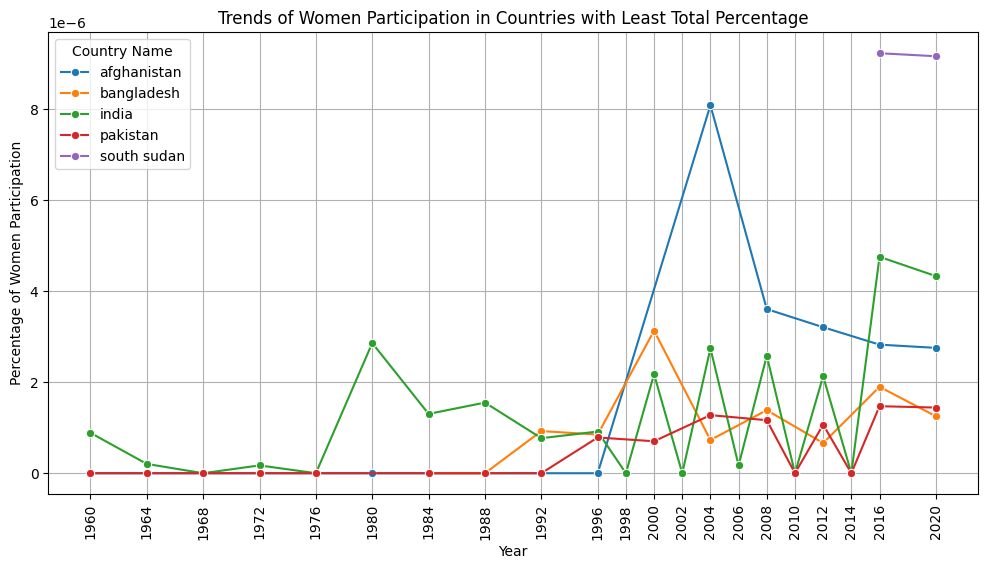

In [440]:
total_percentage_by_country = merged_data.groupby('Country Name')['percentage_women'].sum().reset_index()

least_countries = total_percentage_by_country.nsmallest(5, 'percentage_women')['Country Name']

df_least = merged_data[merged_data['Country Name'].isin(least_countries)]


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_least, x='year', y='percentage_women', hue='Country Name', marker='o')
plt.title('Trends of Women Participation in Countries with Least Total Percentage')
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.xticks(df_least['year'].unique())
plt.grid(True)
plt.xticks(rotation=90)
plt.legend(title='Country Name')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

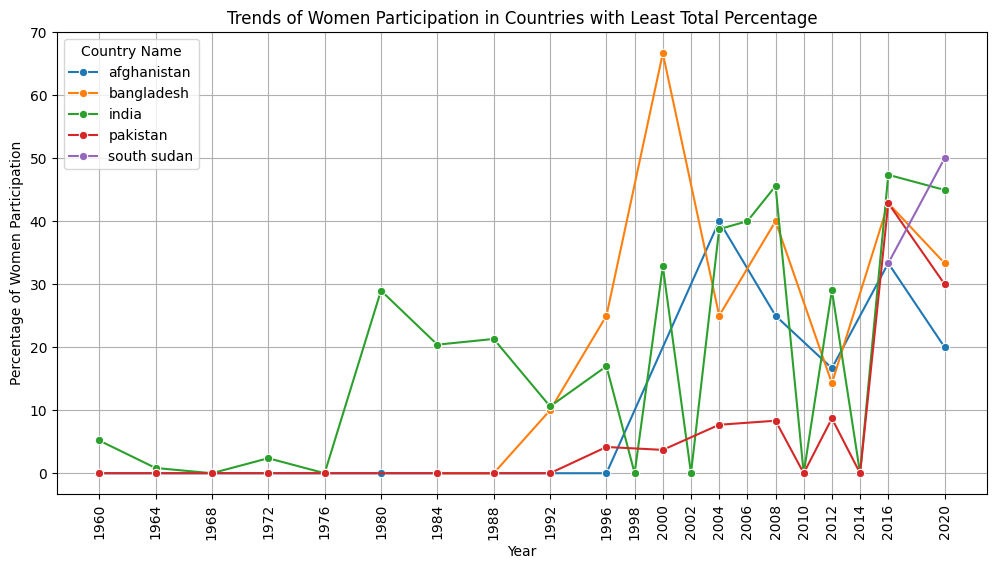

In [441]:
total_percentage_by_country = merged_data.groupby('Country Name')['percentage_women'].sum().reset_index()

least_countries = total_percentage_by_country.nsmallest(5, 'percentage_women')['Country Name']

df_least = merged_data[merged_data['Country Name'].isin(least_countries)]


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_least, x='year', y='percentage_women_better', hue='Country Name', marker='o')
plt.title('Trends of Women Participation in Countries with Least Total Percentage')
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.xticks(df_least['year'].unique())
plt.grid(True)
plt.xticks(rotation=90)
plt.legend(title='Country Name')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

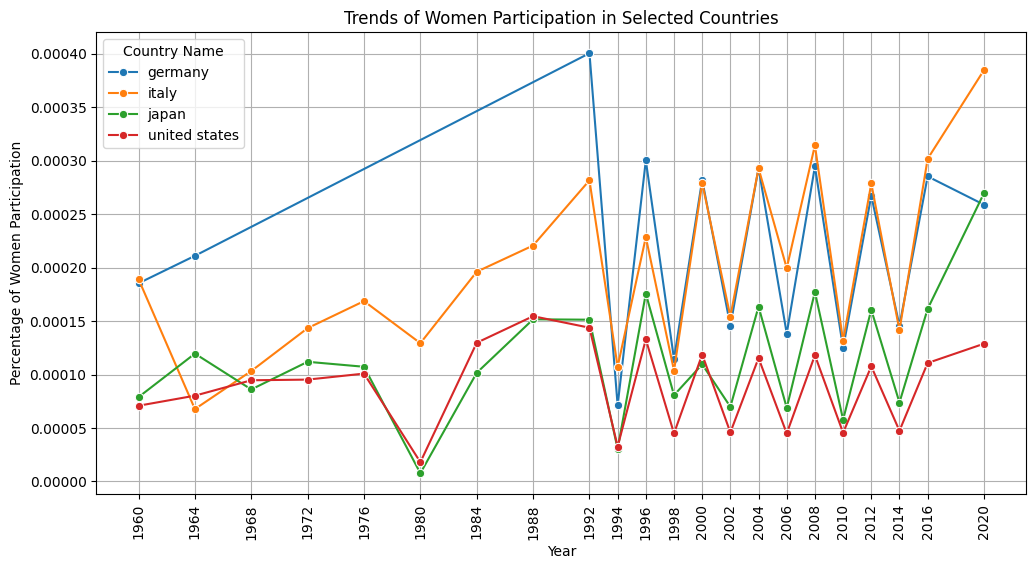

In [442]:
selected_countries = ['united states', 'italy', 'germany', 'china', 'japan']
df_selected = merged_data[merged_data['Country Name'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='year', y='percentage_women', hue='Country Name', marker='o')
plt.title('Trends of Women Participation in Selected Countries')
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.xticks(df_selected['year'].unique(), rotation=90)
plt.grid(True)
plt.legend(title='Country Name')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

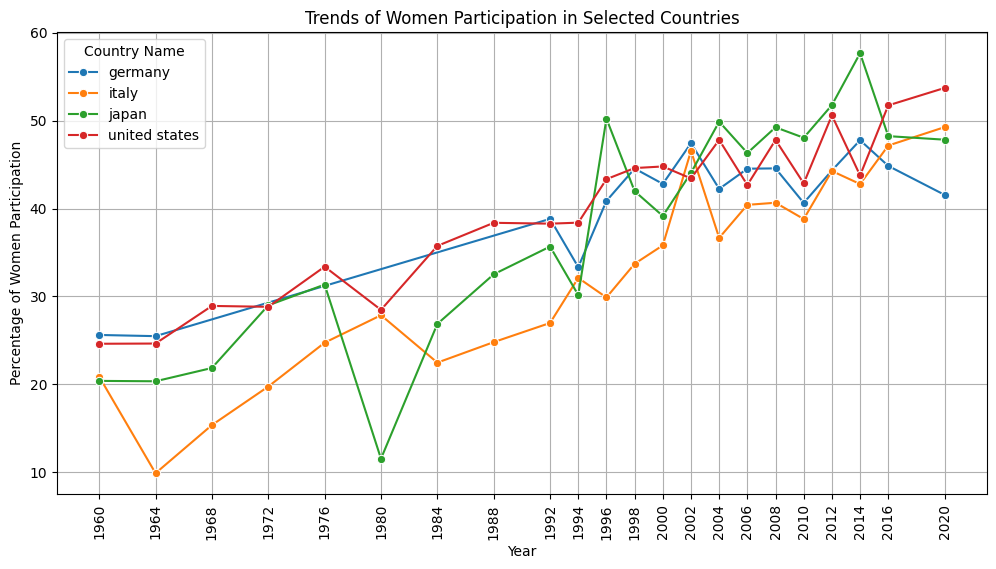

In [443]:
selected_countries = ['united states', 'italy', 'germany', 'china', 'japan']
df_selected = merged_data[merged_data['Country Name'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='year', y='percentage_women_better', hue='Country Name', marker='o')
plt.title('Trends of Women Participation in Selected Countries')
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.xticks(df_selected['year'].unique(), rotation=90)
plt.grid(True)
plt.legend(title='Country Name')
plt.show()

# Exploratory Data Analysis
>Non Popular sports


In [444]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [445]:
summer_data = Event_Results[Event_Results['summer'] == 1]

summer_data['year'] = pd.to_numeric(summer_data['year'], errors='coerce')
summer_data['participants'] = pd.to_numeric(summer_data['participants'], errors='coerce')

summer_data.dropna(subset=['year', 'participants'], inplace=True)
sport_year_participants = summer_data.groupby(['sport', 'year'])['participants'].sum().reset_index()

<ipython-input-445-4608527974ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['year'] = pd.to_numeric(summer_data['year'], errors='coerce')
<ipython-input-445-4608527974ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['participants'] = pd.to_numeric(summer_data['participants'], errors='coerce')
<ipython-input-445-4608527974ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [446]:
trend_data = []
for sport, group in sport_year_participants.groupby('sport'):
    if len(group) < 2:
        continue
    slope, intercept, r_value, p_value, std_err = linregress(group['year'], group['participants'])
    trend_data.append({'sport': sport, 'slope': slope, 'p_value': p_value, 'group': group})

trend_df = pd.DataFrame(trend_data)

In [447]:
declining_sports = trend_df[trend_df['slope'] < 0].sort_values('slope').head(10)

In [448]:
print("\nTop 5 Sports with Declining Trends:")
print(declining_sports[['sport', 'slope']])


Top 5 Sports with Declining Trends:
                sport     slope
1   american football -4.750000
36       motorboating -2.250000
37               polo -1.845528
44           softball -1.264151
14       canoe slalom -1.048902
13     canoe marathon -0.982143
47          taekwondo -0.677928
28               golf -0.126781
33           lacrosse -0.100610


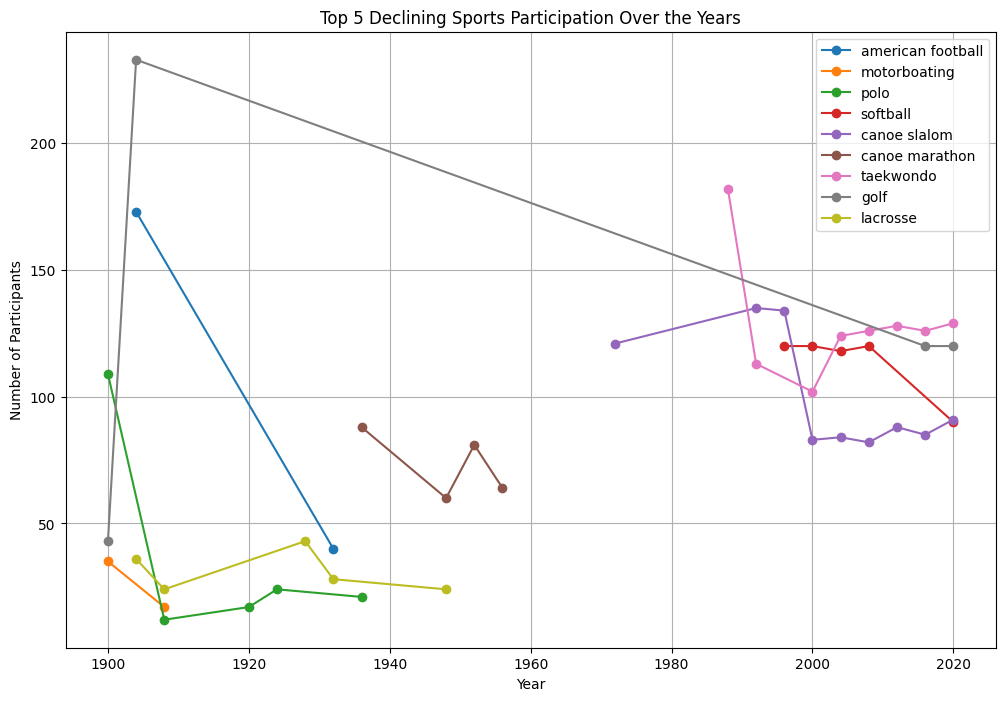

In [449]:
plt.figure(figsize=(12, 8))
for _, row in declining_sports.iterrows():
    sport_data = row['group']
    plt.plot(sport_data['year'], sport_data['participants'], marker='o', label=row['sport'])

plt.title('Top 5 Declining Sports Participation Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend()
plt.grid()
plt.show()

# Exploratory Data Analysis

> Country-wise Comparison of Team vs. Individual Sport Medals Over the Years

In [450]:
pip install pandasql


In [451]:
import pandasql as ps

In [452]:
query_usa = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('usa')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_usa = ps.sqldf(query_usa, locals())

print(medals_yearwise_data_usa)


    year country_noc  isTeamSport  medal_count
0   1896         usa            0           20
1   1900         usa            0           45
2   1900         usa            1           19
3   1904         usa            0          209
4   1904         usa            1          213
..   ...         ...          ...          ...
68  2018         usa            1           52
69  2020         usa            0           85
70  2020         usa            1          212
71  2022         usa            0           18
72  2022         usa            1           54

[73 rows x 4 columns]


In [453]:
query_ger = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('ger')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_ger = ps.sqldf(query_ger, locals())

print(medals_yearwise_data_ger)


    year country_noc  isTeamSport  medal_count
0   1896         ger            0           11
1   1896         ger            1           22
2   1900         ger            0            2
3   1900         ger            1           44
4   1904         ger            0           14
5   1908         ger            0            9
6   1908         ger            1           12
7   1912         ger            0           19
8   1912         ger            1           34
9   1928         ger            0           31
10  1928         ger            1           67
11  1932         ger            0           18
12  1932         ger            1           46
13  1936         ger            0           81
14  1936         ger            1          166
15  1952         ger            0           20
16  1952         ger            1           40
17  1956         ger            0           16
18  1956         ger            1           31
19  1960         ger            0           33
20  1960     

In [454]:
query_ita = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('ita')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_ita = ps.sqldf(query_ita, locals())

print(medals_yearwise_data_ita)


    year country_noc  isTeamSport  medal_count
0   1900         ita            0            5
1   1908         ita            0            3
2   1908         ita            1            5
3   1912         ita            0            7
4   1912         ita            1           18
..   ...         ...          ...          ...
63  2018         ita            1            9
64  2020         ita            0           28
65  2020         ita            1           48
66  2022         ita            0           13
67  2022         ita            1           15

[68 rows x 4 columns]


In [455]:
query_aus = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('aus')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_aus = ps.sqldf(query_aus, locals())

print(medals_yearwise_data_aus)


    year country_noc  isTeamSport  medal_count
0   1896         aus            0            2
1   1896         aus            1            2
2   1900         aus            0            3
3   1920         aus            0            2
4   1920         aus            1            5
5   1924         aus            0            5
6   1924         aus            1           26
7   1928         aus            0            4
8   1932         aus            0            5
9   1936         aus            0            1
10  1948         aus            0           12
11  1948         aus            1            5
12  1952         aus            0            9
13  1952         aus            1           11
14  1956         aus            0           25
15  1956         aus            1           49
16  1960         aus            0           17
17  1960         aus            1           29
18  1964         aus            0           13
19  1964         aus            1           33
20  1968     

In [456]:
query_ind = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('ind')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_ind = ps.sqldf(query_ind, locals())

print(medals_yearwise_data_ind)


    year country_noc  isTeamSport  medal_count
0   1900         ind            0            2
1   1924         ind            1           21
2   1928         ind            1           15
3   1932         ind            1           15
4   1936         ind            1           22
5   1948         ind            1           20
6   1952         ind            0            1
7   1952         ind            1           18
8   1956         ind            1           18
9   1960         ind            1           21
10  1964         ind            1           18
11  1968         ind            1           17
12  1972         ind            1           18
13  1980         ind            1           16
14  1996         ind            0            1
15  2000         ind            0            1
16  2004         ind            0            1
17  2008         ind            0            3
18  2012         ind            0            6
19  2016         ind            0            2
20  2020     

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


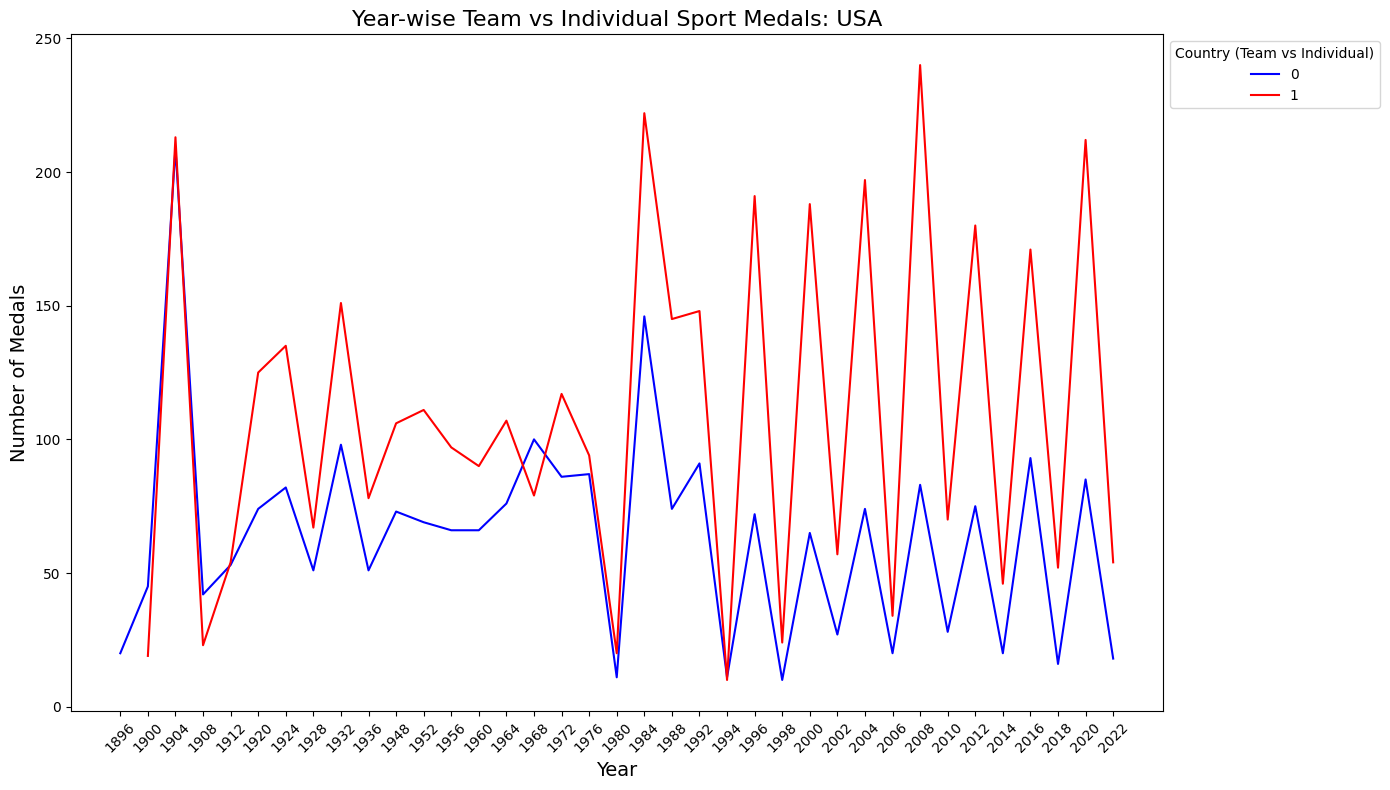

In [457]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_usa,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: USA', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


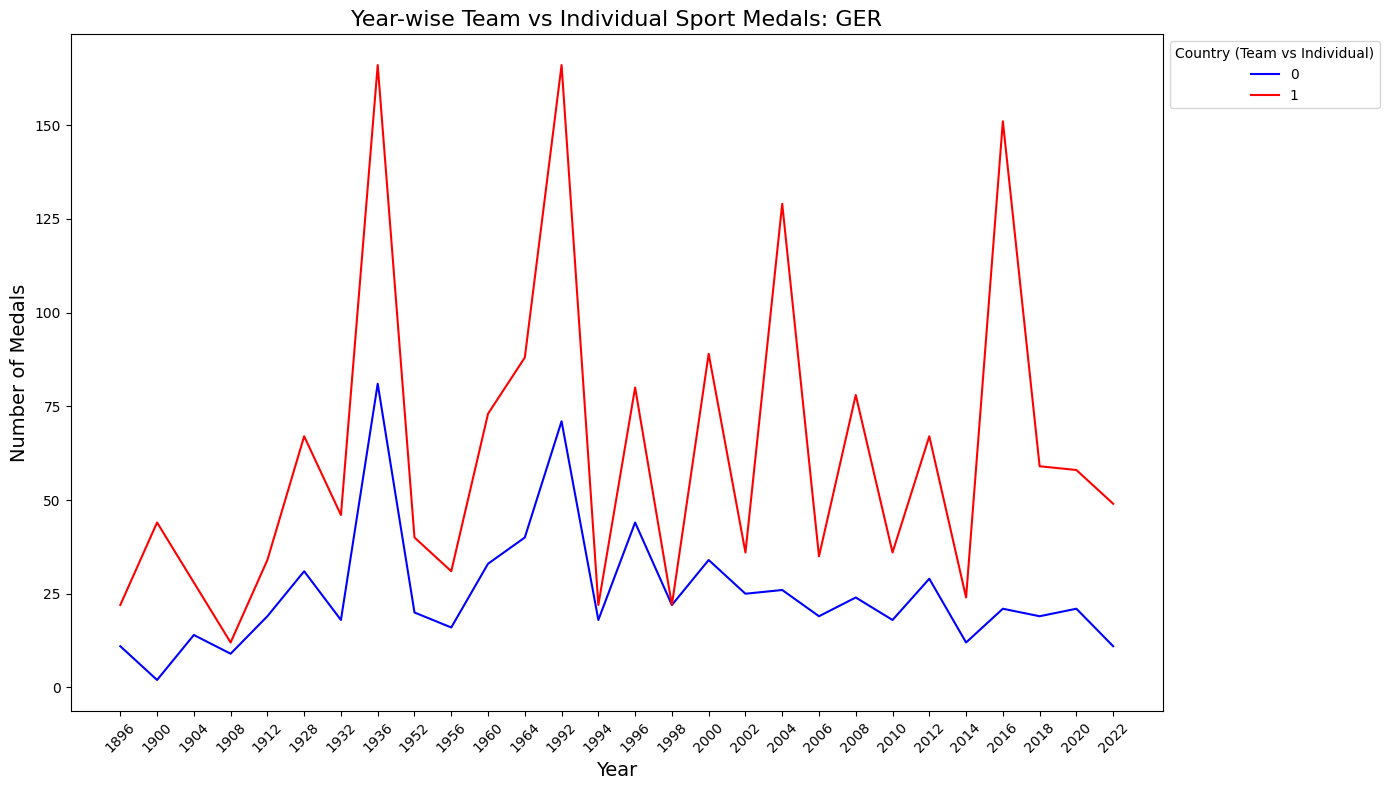

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_ger,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: GER', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


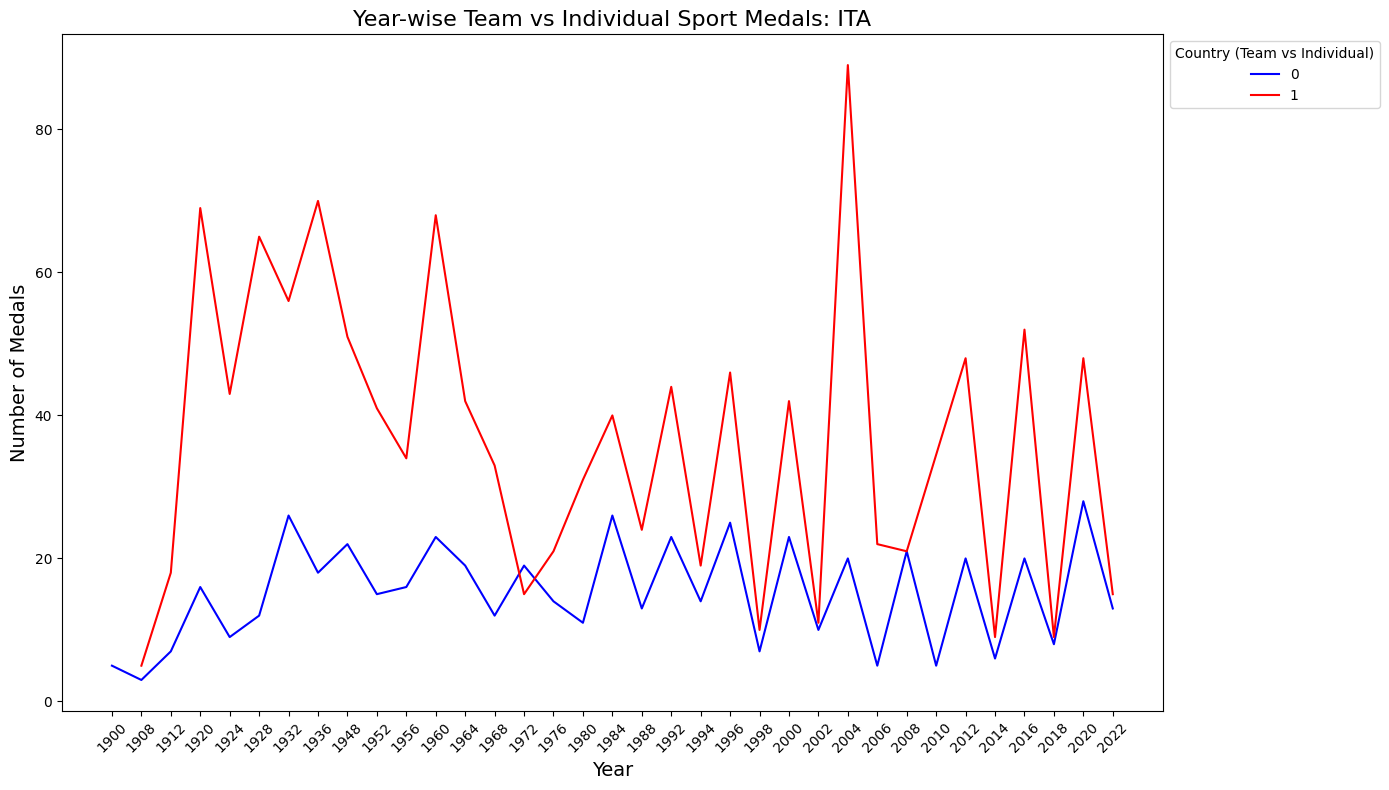

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_ita,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: ITA', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


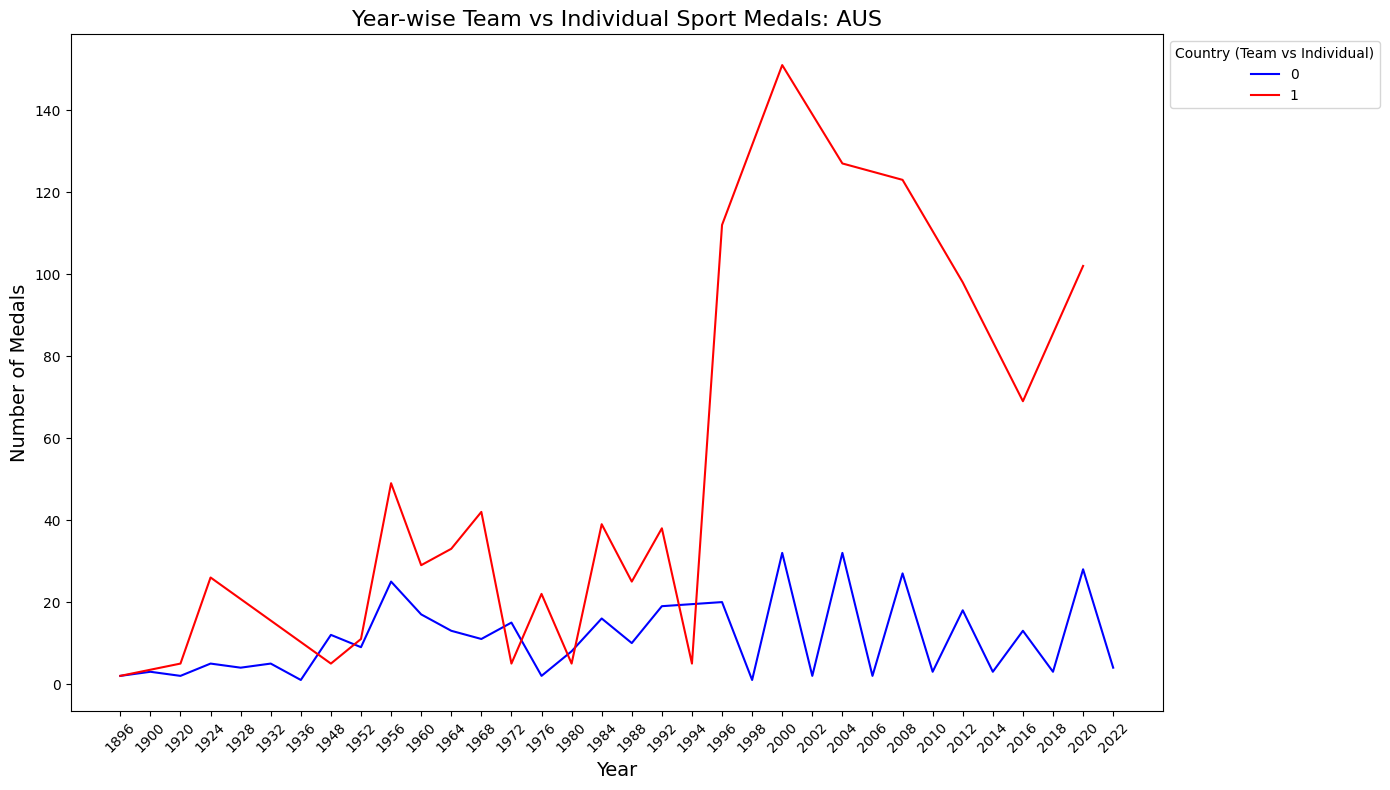

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_aus,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: AUS', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


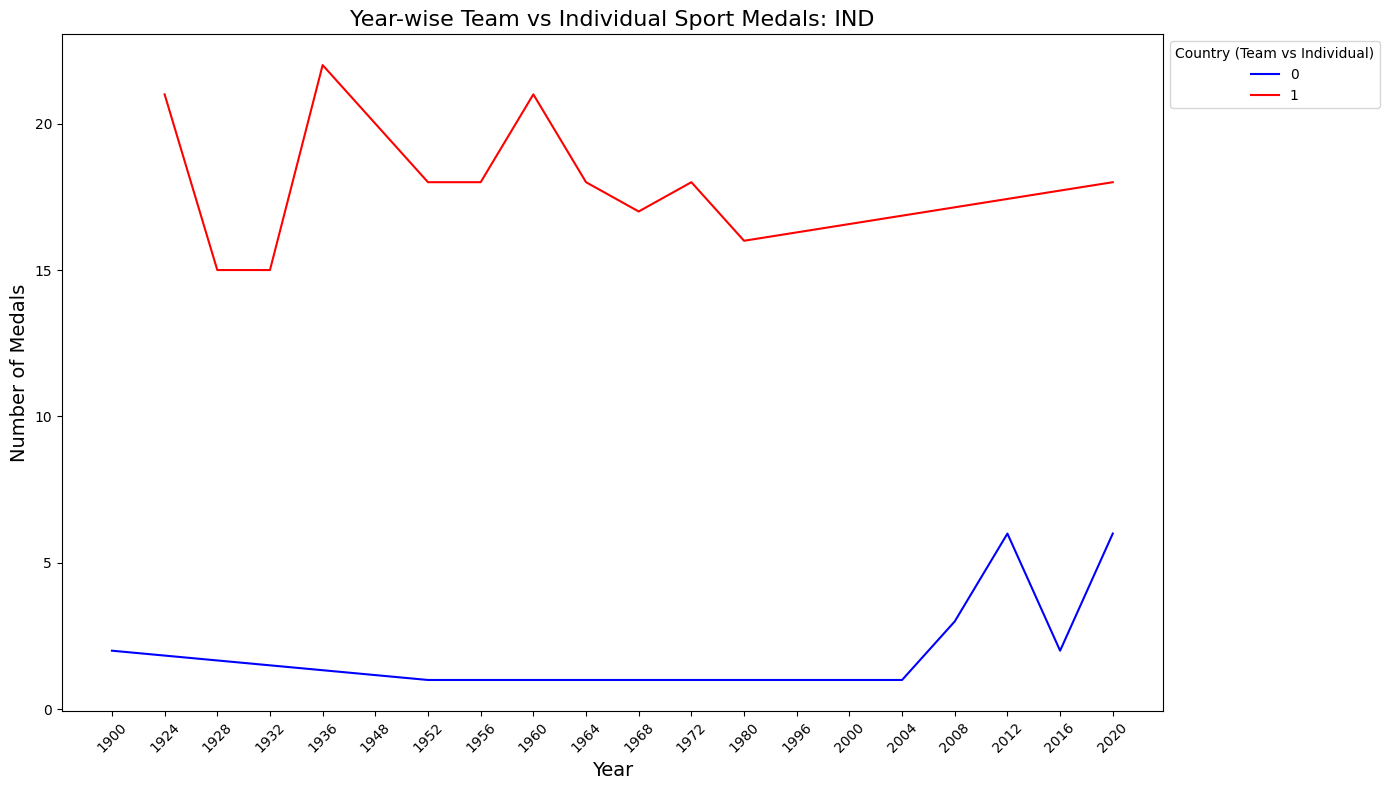

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_ind,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: IND', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Exploratory Data Analysis

> Sport-wise Trend of Women’s Participation Over the Years

In [462]:
query = """
    SELECT
    sport,
    year,
    COUNT(athlete_id) AS women_participation_count
FROM Athlete_Events_Details
WHERE
    women = 1
    AND year IS NOT NULL
GROUP BY sport, year
ORDER BY women_participation_count ;
    """

women_participation = ps.sqldf(query, locals())

print(women_participation)

                     sport  year  women_participation_count
0      artistic gymnastics  1900                          1
1           figure skating  1908                          6
2           figure skating  1920                          6
3                badminton  1972                          8
4    cycling bmx freestyle  2020                          9
..                     ...   ...                        ...
585              athletics  2000                       1053
586              athletics  2004                       1064
587              athletics  2012                       1114
588              athletics  2008                       1115
589              athletics  2016                       1216

[590 rows x 3 columns]


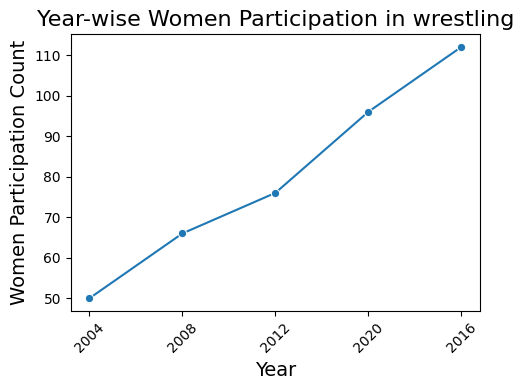

In [463]:
selected_sport = 'wrestling'
filtered_sport_data = women_participation[women_participation['sport'] == selected_sport]

plt.figure(figsize=(5, 4))
sns.lineplot(
    data=filtered_sport_data,
    x='year',
    y='women_participation_count',
    marker='o',
    dashes=False
)

plt.title(f'Year-wise Women Participation in {selected_sport}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Women Participation Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


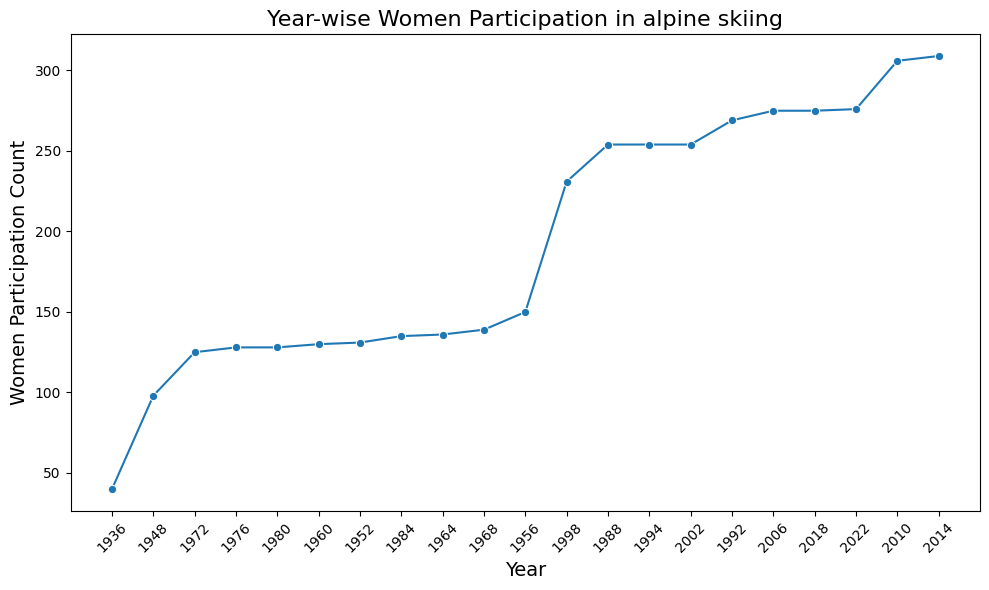

In [464]:
selected_sport = 'alpine skiing'
filtered_sport_data = women_participation[women_participation['sport'] == selected_sport]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=filtered_sport_data,
    x='year',
    y='women_participation_count',
    marker='o',
    dashes=False
)

plt.title(f'Year-wise Women Participation in {selected_sport}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Women Participation Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


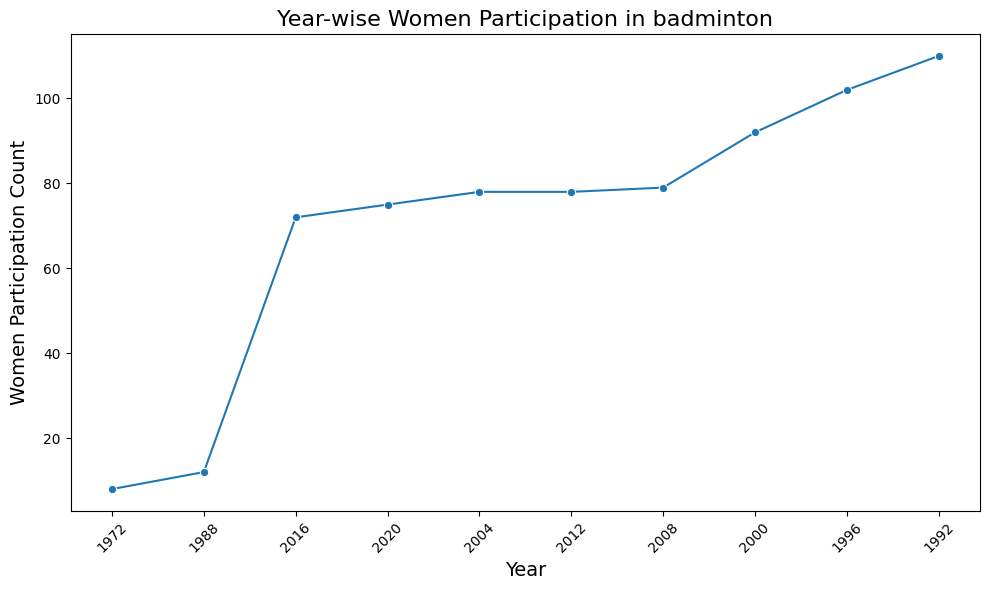

In [465]:

selected_sport = 'badminton'
filtered_sport_data = women_participation[women_participation['sport'] == selected_sport]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=filtered_sport_data,
    x='year',
    y='women_participation_count',
    marker='o',
    dashes=False
)

plt.title(f'Year-wise Women Participation in {selected_sport}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Women Participation Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


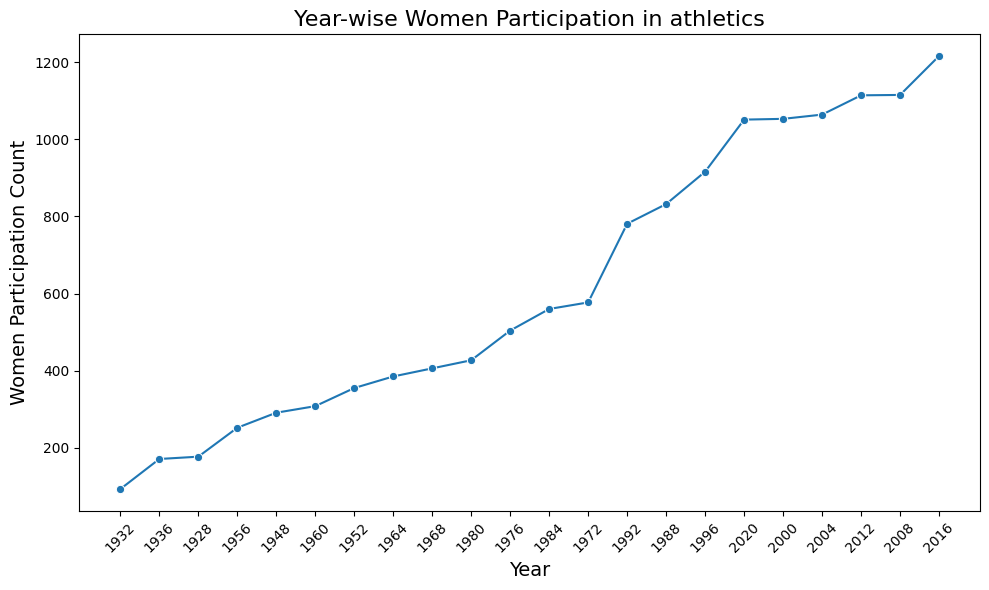

In [466]:
selected_sport = 'athletics'
filtered_sport_data = women_participation[women_participation['sport'] == selected_sport]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=filtered_sport_data,
    x='year',
    y='women_participation_count',
    marker='o',
    dashes=False
)

plt.title(f'Year-wise Women Participation in {selected_sport}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Women Participation Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
